## 이번 강의 목표  

* Scikit-learn의 서포트벡터 머신 모델들에 대한 이해와 선택 기준  


* 실습  


* 복습할 내용   
> * numpy.ndarray.reshape() ([API](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html?highlight=reshape#numpy.ndarray.reshape))  
> * numpy.ndarray.astype() ([API](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html?highlight=astype#numpy.ndarray.astype))   
> * numpy.hstack() ([API](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html?highlight=hstack))   
> * numpy.logical_xor() ([API](https://numpy.org/doc/stable/reference/generated/numpy.logical_xor.html?highlight=logical_xor#numpy.logical_xor))
$$ $$
> * sklearn.model_selection.cross_val_score() ([API](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score))  
> * sklearn.model_selection.cross_val_predict() ([API](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict))  
> * sklearn.preprocessing.StandardScaler() ([API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler))

## 서포트벡터머신에 대한 Scikit-learn의 클래스들

* <span style="color:blue">서포트벡터머신의 모델은 모두 특성벡터의 스케일에 민감하므로, 학습을 시키기 전에 스케일링을 하는 것을 기억 </span>
$$
$$
* `sklearn.linear_model` 모듈의 확률적 경사하강법을 이용한 선형 서포트벡터머신 모델:   
> * 회귀: `SGDRegressor(loss="epsilon_insensitive")`또는 `SGDRegressor(loss="squared_epsilon_insensitive")` ([API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html))  
$$ $$
> * 분류: `SGDClassifier(loss="hinge")`또는 `SGDRegressor(loss="squared_hinge")` ([API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=sgdclassifier#sklearn.linear_model.SGDClassifier))  
$$ $$
> * 확률적 경사하강법으로 구현된 위의 클래스를 이용하여 생성된 SVM 모델의 객체에 대해서는 규제(regularization)에 대한 하이퍼파라미터가 `alpha` (C와 역수관계임에 유의, alpha가 커지면 규제가 커지고, alpha가 작아지면 규제가 작아짐)  

* `sklearn.svm` 모듈의 선형 서포트벡터머신 모델: `liblinear`라이브러리를 이용한 최적화 알고리즘 사용
> * 회귀: `LinearSVR` ([API](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html?highlight=linearsvr#sklearn.svm.LinearSVR))  
>> * 손실함수의 기본값인 `loss="epsilon_insensitive"`를 사용하면 $\ell_1$ 규제를 사용, $\ell_2$ 규제를 사용하려면  `loss="squared_epsilon_insensitive"`로 설정  
$$ $$
> * 분류: `LinearSVC` ([API](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=linearsvc#sklearn.svm.LinearSVC))  
>> * 기본적인 선형 서포트벡터머신 분류기를 사용하려면 `loss="hinge"`로 설정 (기본값은 "sqaured_hinge")  
$$ $$
> * 규제 하이퍼파라미터는 `C`임에 주의(C가 커지면 규제가 작아지고, C가 작아지면 규제가 커짐)  
$$ $$
> * 서포트벡터 모델에서의 최적화 문제에 대한 쌍대문제를 이용할 지를 결정하는 클래스 입력변수는 `dual`  
>> * 기본값은 `dual=True`  
>> * 일반적으로 샘플의 개수가 특성벡터의 개수보다 많을 때는 `dual=False`로 설정하는 것이 효율적 


* `sklearn.svm` 모듈의 (커널) 서포트벡터머신 모델: `libsvm`라이브러리를 이용한 최적화 알고리즘 사용  
> * 기본적으로 커널 서포트벡터머신 모델에서 쌍대문제에 대한 최적화를 하는 것이므로 훈련 데이터 샘플의 개수가 너무 많으면 비효율적임  
>> * 훈련 샘플의 개수가 수만개를 넘는 경우에는 비효율적일 수 있음  
$$ $$
> * 회귀에 사용되는 `SVR` ([API](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html?highlight=svr#sklearn.svm.SVR))과 분류에 사용되는 `SVC`([API](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC))가 있음  
>> * `SVC`을 이용하여 3종류 이상의 레이블을 갖는 다중분류 문제를 해결하는 전략을 선택하는 변수는 `decision_function_shape` 
>> * 일대다 전략은 `decision_function_shape="ovr"`, 일대일 전략은 `decision_function_shape="ovo"`로 선택  
>> * 레이블의 종류가 많은 경우에는 "ovo" 전략이 효율적일 수 있음  
>> * <span style="color:blue"> 학습된 객체의 속성 `support_`를 이용하면 서포트벡터의 index를 구할 수 있고, 속성 `support_vectors_`를 이용하면 서포트벡터를 구할 수 있음</span>
$$ $$
> * 입력변수 `kernel`을 `"linear"`로 설정하면 쌍대문제를 이용한 선형 서포트벡터머신 모델  
>> * `kernel`로 선택할 수 있는 기본적인 커널함수는 "linear", "poly", "rbf", "sigmoid"  
$$ $$
> * 특정 커널과 관련된 입력변수들은 `ML2020-10-01-서포트벡터머신 모델 1 (이론 및 사이킷런 클래스 설명)`의 커널 트릭 부분 설명과 위 API 참고  
$$ $$
> * 사용자가 새롭게 정의한 커널을 사용하는 두 가지 방법이 있음  (자세한 내용은 다음 [reference](https://scikit-learn.org/stable/modules/svm.html#svm-kernels)를 읽고 확인할 것, 참고할 [예제링크](https://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#sphx-glr-auto-examples-svm-plot-custom-kernel-py))
>> * ([reference]에 설명된)조건을 만족하는 커널함수를 파이썬에서 mykernel로 정의한 후 `kernel=mykernel`과 같이 전달(<span style="color:blue">문자열이 아닌 함수이름으로 전달하는 것이 주목</span>)하는 방법    
$$ $$
>> * 새롭게 정의한 커널함수 $K$를 이용하여 $m$개의 훈련 샘플에 대한 $m\times m$ Gram 행렬 $(K(\mathbf x_i, \mathbf x_j))$을 미리 계산하고,  `kernel="precomputed"`로 설정한 다음 객체를 학습시킬 때 `fit()`에 대한 입력으로 훈련데이터셋에 행렬 대신, 계산된 Gram 행렬을 전달 

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

#### MNIST 데이터셋 다운로드 후 불러들이기  

* 기계학습의 고전적인 데이터셋  

* 미국 고등학생과 인구조사국 직원의 숫자 손글씨 7만개를 이용해 만들어진 $28\times 28$ 크기의 이미지 데이터셋 
> * 처음 6만개 샘플은 훈련 데이터셋, 마지막 만개의 샘플은 테스트 데이터셋  
> * target에 저장된 레이블은 문자열 

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [9]:
X, y = mnist["data"], mnist["target"]

print(X.shape, y.shape)
type(y[0])

(70000, 784) (70000,)


str

In [10]:
y = y.astype(np.uint8)

#### 입력 샘플 그림으로 확인 

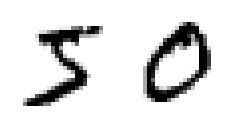

In [11]:
some_digit1 = X[0]
some_digit2 = X[1]
some_digit_image1 = some_digit1.reshape(28,28)
some_digit_image2 = some_digit2.reshape(28,28)
some_image = np.hstack([some_digit_image1, some_digit_image2])
plt.figure(figsize=(4,8))
plt.imshow(some_image, cmap="binary")
plt.axis("off")
plt.show()

#### 이미지에 대응하는 레이블 확인 

In [12]:
print(y[0], y[1])

5 0


## 4와 나머지 숫자를 구분하는 서포트벡터머신 분류기 

* 데이터셋을 훈련 데이터셋과 테스트 데이터셋으로 나누고 

* 레이블이 4인 것은 1로, 레이블이 4가 아닌 것은 0으로 수정한 후 학습  

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_4 = (y_train == 4)
y_test_4 = (y_test == 4)

In [16]:
y_train_4[:10].astype(np.uint8)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

### 1. SGDClassifier를 이용한 SVC 생성과 교차검증을 이용한 성능 측정  

> * $k$-겹 교차검증에 대한 score만 구할 때: `sklearn.model_selection.cross_val_score` 이용  
> * $k$-겹 교차검증에 대한 예측값이 필요할 때: `sklearn.model_selection.cross_val_predict` 이용  
> * `ML2020-05-01-교차검증을 이용한 분류기의 성능 평가` 내용 복습 및 참고 

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="hinge", random_state=123)

In [18]:
from time import time 

In [19]:
start = time()
print(cross_val_score(sgd_clf, X_train, y_train_4, cv=3, scoring="accuracy"))
time()-start

[0.9763  0.9735  0.95655]


26.294976234436035

#### 정밀도, 재현율 

In [12]:
start = time()
print(cross_val_score(sgd_clf, X_train, y_train_4, cv=3, scoring="precision"))
time()-start

[0.86769845 0.84177521 0.70243902]


24.624820232391357

In [13]:
start = time()
print(cross_val_score(sgd_clf, X_train, y_train_4, cv=3, scoring="recall"))
time()-start

[0.89265537 0.89625064 0.96098563]


24.25176739692688

#### 스케일링을 한 다음 학습 시키는 경우 

In [22]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [24]:
start = time()
print(cross_val_score(sgd_clf, X_train_scaled, y_train_4, cv=3, scoring="accuracy"))
time()-start

[0.97885 0.97695 0.98005]


53.56697106361389

### 2. SVC(kernel="rbf") 를 이용한 SVC 생성과 교차검증을 이용한 성능 측정  

* 샘플의 개수(60000개)가 특성 수(784개) 보다 큰 경우: `LinearSVC(dual=False)`보다 시간이 많이 걸림 

In [25]:
from sklearn.svm import SVC 
svm_clf = SVC(kernel="rbf")

In [26]:
start = time()
print(cross_val_score(svm_clf, X_train_scaled, y_train_4, cv=3, scoring="accuracy", n_jobs=-1))
time()-start

[0.9926  0.99085 0.99215]


370.1666090488434

### 3. SVC(kernel="rbf", decision_function_shape="ovo")을 이용한 다중 분류기 

* 실습 시간 관계상 레이블이 $0,3,4$인 데이터 샘플만 추려서 3개의 클래스에 대한 분류를 실습 

* OvR 전략을 선택하는 경우 학습에 사용되는 훈련데이터 개수는 대략 30000개, 예측기 3개  

* OvO 전략을 선택하는 경우 학습에 사용되는 훈련데이터 개수는 대략 12000개, 6개 

* 아래 코드를 차례로 실행시키면서 결과를 확인하시오. 

In [18]:
label0 = (y_train==0)
label3 = (y_train==3)
label4 = (y_train==4)

idx = label0 | label3 | label4

In [19]:
X_train_red = X_train_scaled[idx]
y_train_red = y_train[idx]

In [ ]:
# 다음을 실행시키시오. (30분이상 시간이 소요될 수 있음)

svm3_clf = SVC(kernel="rbf", decision_function_shape="ovo")
svm3_clf.fit(X_train_red, y_train_red)

In [ ]:
# 학습된 다중(3개 클래스) 분류기에 대한 예측값과 실제값 비교 

print(svm3_clf.predict([X_train_red[4:10]]))

print(y_train_red[4:10])

In [ ]:
# 학습된 객체의 decision_function을 이용하면 각 샘플마다 각 클래스에 속할 score를 반환함 

some_digit_score = svm3_clf.decision_function(X_train_red[4:5])
print(some_digit_score)

In [ ]:
# 학습된 분류기 객체는 classes_ 속성에 레이블을 값으로 정렬하여 저장함 

svm3_clf.classes_

In [ ]:
# 위에서 구한 score가 가장 높은 인덱스에 대응되는 클래스를 svm3_clf.classes_에서 읽으면 예측값 

result_id = np.argmax(some_digit_score)
print(svm3_clf.classes_[result_id])
print(y_train_red[4])

### 3. 커널 SVC 실습 

* xor 연산과 관련된 데이터셋  

* 퍼셉트론의 한계를 보여준 예이자, 다층 신경망의 유용함을 보여준 예  

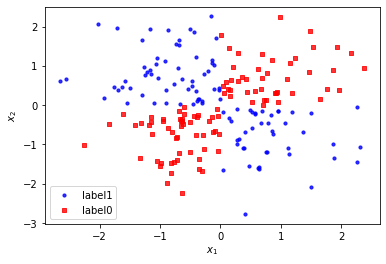

In [27]:
np.random.seed(0)

X = np.random.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
y = y.astype(np.uint8)

plt.scatter(X[y == 1, 0], X[y == 1, 1],
            c='b', marker='o', label='label1', s=10, alpha=0.8)
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            c='r', marker='s', label='label0', s=10, alpha=0.8)
plt.legend()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()

In [28]:
# 2차 다항식 커널을 이용한 SVC모델 (xy 항이 생기므로 분리가능)

poly_svm_clf = SVC(kernel="poly", degree=2)
poly_svm_clf.fit(X,y)


poly_svm_clf1000 = SVC(kernel="poly", degree=2, C=1000)
poly_svm_clf1000.fit(X,y)

SVC(C=1000, degree=2, kernel='poly')

In [30]:
import matplotlib as mpl

def plot_xor(x1, x2, model, title=None, x1min=-3, x1max=3, x2min=-3, x2max=3):
    xx1, xx2 = np.meshgrid(np.linspace(x1min, x1max,1000),
                         np.linspace(x2min, x2max,1000))
    zz = np.reshape(model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T), xx1.shape)
    plt.contourf(xx1, xx2, zz, cmap=mpl.cm.Paired_r, alpha=0.3)
    
    y = np.logical_xor(x1 > 0, x2 > 0)

    plt.scatter(x1[y], x2[y], c='b',
                marker='o', label='label:1', s=10)
    plt.scatter(x1[~y], x2[~y], c='r',
                marker='s', label='label:0', s=10)
    plt.xlim(x1min, x1max)
    plt.ylim(x2min, x2max)
    plt.title(title)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")

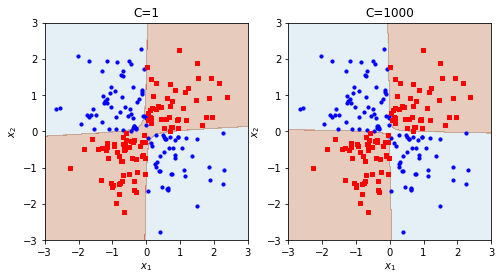

In [31]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_xor(X[:,0],X[:,1],poly_svm_clf, title="C=1")
plt.subplot(122)
plot_xor(X[:,0],X[:,1],poly_svm_clf1000, title="C=1000")

## 코드 연습문제  

1) 사이킷런에서 `OneVsOneClassifier`([API](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html?highlight=onevsoneclassifier#sklearn.multiclass.OneVsOneClassifier))나 `OneVsRestClassifier`([API](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier))를 이용하면 임의의 분류기 객체를 이용하여 OvO전략이나 OvR 전략을 사용하도록 강제할 수 있다. 해당 API를 읽고 사용법을 익히시오. 

2) 커널 SVC 실습에서 `kernel="poly"`를 사용하지 말고, 전처리를 통해 2차 다항식 특성을 생성한 후 스케일링하고, 이를 SVC(kernel="linear")로 학습시킨 후 결과를 비교해 보시오. 

3) 커널 SVC 실습에 사용된 데이터를 이용하여 "rbf" 커널을 사용하는 SVC 모델로 학습을 시키되, `gamma` 파라미터가 $0.1,\ 1,\ 10,\ 100$인 각각의 예측기를 만들어서 그 결과를 그림으로 비교하고, `gamma`의 의미를 확인하시오. 

> * 그림을 그릴 때는 설명에서 정의한 plot_xor 함수를 이용  
> * 4개의 그림을 2x2 격자형태로 나열하려면 위 설명에서 마지막 코드에서  
>> * plt.figure(figsize=(8,8))
>> * n=1,2,3,4일 때, plt.suplot(22n)을 이용하면 됨  

4) 다음 코드를 실행시켜 두 개의 반달모양 데이터셋을 생성하고 그림을 확인한 뒤, 다양한 커널 SVC를 이용하여 분류하고, 성능을 비교하여 보시오. 

    from sklearn.datasets import make_moons
    
    X, y = make_moons(n_samples=300, noise=0.15)
    plt.scatter(X[y==1,0], X[y==1,1], c='b', marker='o', label="label:1", s=10)
    plt.scatter(X[y==0,0], X[y==0,1], c='r', marker='s', label="label:0", s=10)
    plt.legend()
    plt.show()

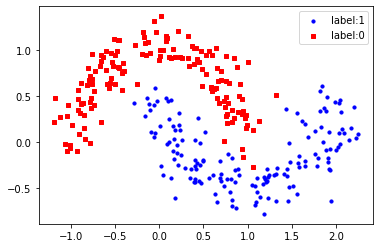

In [5]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=300, noise=0.15)
plt.scatter(X[y==1,0], X[y==1,1], c='b', marker='o', label="label:1", s=10)
plt.scatter(X[y==0,0], X[y==0,1], c='r', marker='s', label="label:0", s=10)
plt.legend()
plt.show()